## Solving 1D time-dependent Poisson Eqn with Periodic Boundary Conditions using PINNs

@author:  Sayantan 

Date :  27 March 2023

In [3]:
"""Backend supported: tensorflow.compat.v1, tensorflow, pytorch"""
import deepxde as dde
import numpy as np

# Import TensorFlow and NumPy
import tensorflow as tf
import numpy as np
from tensorflow.keras.layers import Input, Concatenate, Flatten, Dense, Conv2D, MaxPool2D, Dropout, BatchNormalization, Lambda
import matplotlib.pyplot as plt

np.random.seed(1234)
tf.random.set_seed(1234)

## The poisson's equation

$$
\begin{equation}
\nabla^2 \phi =  4 \pi G \rho
\end{equation} \tag{7}
$$
or rewriting interm of the field


\begin{equation}
\nabla \phi =  - \vec g 
% \nabla . \vec g = -4\pi G\rho
\end{equation}

$$
\begin{equation}
\nabla . \vec g = -4\pi G\rho
\end{equation}
$$

The density is 

$$
\begin{equation}
\rho = \rho_1 \cos(2\pi x/\lambda - 2\pi Ct/\lambda )
\end{equation}
$$

$$
\begin{equation}
\partial_x \phi(x=x_{min}) =\partial_ \phi(x=x_{max})
\end{equation}
$$


In [4]:
## We test the solution of the POISSON's EQN 
#Set data type
DTYPE='float32'
tf.keras.backend.set_floatx(DTYPE)
#%matplotlib inline

lam = 1.0          # one wavelength
num_of_waves = 2
rho_1 = 0.03;       # question 2b non-linear wave propagation
rho_o = 1          # zeroth order density
C = 1
def pdeTest(x, y):
    dy_xx = dde.grad.hessian(y, x)    
    return dy_xx - 4 * np.pi * (rho_1 * tf.cos(2*np.pi*x[:, 0:1]/lam- 2*np.pi*C*x[:, 1:2]/lam))


Compiling model...
Building feed-forward neural network...


/home/sauddy3/PINNS-envcedar/lib/python3.10/site-packages/deepxde/nn/tensorflow_compat_v1/fnn.py:114: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  return tf.layers.dense(


'build' took 0.454288 s



2023-03-29 19:03:08.847479: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-29 19:03:14.598056: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:42] Overriding orig_value setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
2023-03-29 19:03:14.611079: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1613] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 4196 MB memory:  -> device: 0, name: Tesla P100-PCIE-12GB, pci bus id: 0000:03:00.0, compute capability: 6.0


'compile' took 7.423384 s

Initializing variables...


2023-03-29 19:03:15.818437: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:357] MLIR V1 optimization pass is not enabled


Training model...



2023-03-29 19:03:17.016770: I tensorflow/compiler/xla/service/service.cc:173] XLA service 0x2b4020009670 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-03-29 19:03:17.016897: I tensorflow/compiler/xla/service/service.cc:181]   StreamExecutor device (0): Tesla P100-PCIE-12GB, Compute Capability 6.0
2023-03-29 19:03:17.474355: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-03-29 19:03:18.451692: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-03-29 19:03:20.635689: I tensorflow/compiler/jit/xla_compilation_cache.cc:477] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


Step      Train loss                        Test loss                         Test metric
0         [7.52e-02, 2.72e-01, 1.78e-02]    [7.52e-02, 2.72e-01, 1.78e-02]    []  


2023-03-29 19:03:23.546703: I tensorflow/compiler/xla/stream_executor/gpu/asm_compiler.cc:325] ptxas warning : Registers are spilled to local memory in function 'fusion_24'



1000      [6.11e-02, 3.29e-05, 2.74e-04]    [6.11e-02, 3.29e-05, 2.74e-04]    []  
2000      [1.30e-04, 5.93e-06, 2.94e-06]    [1.30e-04, 5.93e-06, 2.94e-06]    []  
3000      [5.61e-05, 1.98e-06, 4.59e-07]    [5.61e-05, 1.98e-06, 4.59e-07]    []  

Best model at step 3000:
  train loss: 5.85e-05
  test loss: 5.85e-05
  test metric: []

'train' took 20.464887 s

Compiling model...
'compile' took 0.507402 s



2023-03-29 19:03:36.870309: W tensorflow/compiler/jit/mark_for_compilation_pass.cc:1780] (One-time warning): Not using XLA:CPU for cluster.

If you want XLA:CPU, do one of the following:

 - set the TF_XLA_FLAGS to include "--tf_xla_cpu_global_jit", or
 - set cpu_global_jit to true on this session's OptimizerOptions, or
 - use experimental_jit_scope, or
 - use tf.function(jit_compile=True).

To confirm that XLA is active, pass --vmodule=xla_compilation_cache=1 (as a
proper command-line flag, not via TF_XLA_FLAGS).


Training model...

Step      Train loss                        Test loss                         Test metric
3000      [5.61e-05, 1.98e-06, 4.59e-07]    [5.61e-05, 1.98e-06, 4.59e-07]    []  
4000      [6.90e-08, 8.40e-09, 5.64e-09]    [6.90e-08, 8.40e-09, 5.64e-09]        
INFO:tensorflow:Optimization terminated with:
  Message: CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH
  Objective function value: 0.000000
  Number of iterations: 1082
  Number of functions evaluations: 1179
4179      [5.24e-08, 4.91e-09, 3.94e-09]    [5.24e-08, 4.91e-09, 3.94e-09]    []  

Best model at step 4179:
  train loss: 6.13e-08
  test loss: 6.13e-08
  test metric: []

'train' took 15.841867 s

Saving loss history to /scratch/sauddy3/PINNS-2023/PINNS-Poissons/loss.dat ...
Saving training data to /scratch/sauddy3/PINNS-2023/PINNS-Poissons/train.dat ...
Saving test data to /scratch/sauddy3/PINNS-2023/PINNS-Poissons/test.dat ...


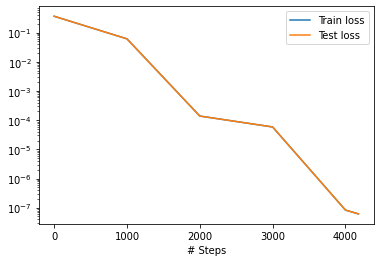

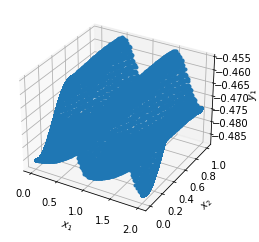

In [5]:
## The Geometric Domain 

xmin = 0
xmax = xmin + lam * num_of_waves
geom = dde.geometry.Interval(xmin, xmax)

timedomain = dde.geometry.TimeDomain(0, 1)
geomtime = dde.geometry.GeometryXTime(geom, timedomain)

## Boundaries

## Note in the deep XDE code by default for the periodic boundary u(0) = u(1)
## If the problem is periodic this condition will also satisfy u(-1) = u(1)
## Thus is most cases the left boundary is not needed. But we have the option here

def boundary_l(x, on_boundary):  # boundary x=-1 or x = 0 
    if xmin == -1:
        is_on_boundary_left = on_boundary and np.isclose(x[0], xmin)
    else:
        is_on_boundary_left = on_boundary and np.isclose(x[0], xmin)
    return is_on_boundary_left

def boundary_r(x, on_boundary):  # boundary x=1
    is_on_boundary_right = on_boundary and np.isclose(x[0], xmax)

    return is_on_boundary_right


bc_l = dde.icbc.PeriodicBC(geomtime, 0, boundary_l,derivative_order=0) ## may be used when x = [-1,1] otherwise for x =[0,1] not needed

bc_r = dde.icbc.PeriodicBC(geomtime, 0, boundary_r,derivative_order=0)

## 1st order terms

bc_ll = dde.icbc.PeriodicBC(geomtime, 0, boundary_l,derivative_order=1) ##may be used when x = [-1,1]

bc_rr = dde.icbc.PeriodicBC(geomtime, 0, boundary_r,derivative_order=1)

data = dde.data.TimePDE(geomtime,
                     pdeTest,
#                      [bc_l,bc_r,bc_ll,bc_rr], ## This is needed if one need to force periodicity on the left 
                     [bc_r,bc_rr],          ## For x =[0,1] and default
                     num_domain=10000,
                     num_boundary=5000
                     #num_initial=5000,
                    # num_test=10000,
                   )

net = dde.nn.FNN([2] + [32] * 3 + [1], "sin", "Glorot normal")
model_test = dde.Model(data, net)

model_test.compile("adam", lr=1e-3)
model_test.train(iterations=3000)
model_test.compile("L-BFGS")


losshistory, train_state = model_test.train()
dde.saveplot(losshistory, train_state, issave=True, isplot=True)

In [6]:
# X = np.vstack((np.ravel(x), np.ravel(y), np.ravel(z))).T
X = np.linspace(xmin,xmax,1000).reshape(1000, 1)

t_0 = np.zeros(1000).reshape(1000, 1)
t_05 = 0.5*np.ones(1000).reshape(1000, 1)
t_1 = 1.0*np.ones(1000).reshape(1000, 1)

X_0 = np.hstack((X, t_0))
X_05 = np.hstack((X, t_05))
X_1 = np.hstack((X, t_1))

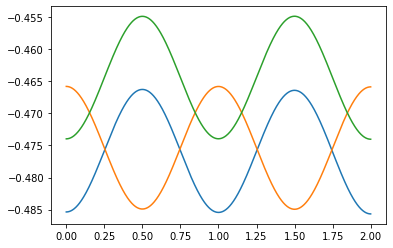

In [7]:
output_0 = model_test.predict(X_0)
output_05 = model_test.predict(X_05)
output_1 = model_test.predict(X_1)
plt.plot(X,output_0)
plt.plot(X,output_05)
plt.plot(X,output_1)